In [1]:
pip install scikit-learn pandas matplotlib seaborn nltk


Note: you may need to restart the kernel to use updated packages.


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [10]:
file_path = r"D:\.pyy\CT TECH\text.csv"
df = pd.read_csv(file_path)

df.head()


,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4


In [11]:
df['label'].value_counts()


label
1    141067
0    121187
3     57317
4     47712
2     34554
5     14972
Name: count, dtype: int64

In [12]:
X = df['text']
y = df['label']


In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [15]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)

X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [16]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)


LogisticRegression(max_iter=1000)

In [17]:
y_pred = model.predict(X_test_vec)


In [18]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Accuracy: 0.8967635133514071

Classification Report:

              precision    recall  f1-score   support

           0       0.94      0.93      0.93     24238
           1       0.91      0.93      0.92     28214
           2       0.81      0.76      0.79      6911
           3       0.90      0.90      0.90     11463
           4       0.85      0.85      0.85      9542
           5       0.77      0.71      0.74      2994

    accuracy                           0.90     83362
   macro avg       0.86      0.85      0.86     83362
weighted avg       0.90      0.90      0.90     83362



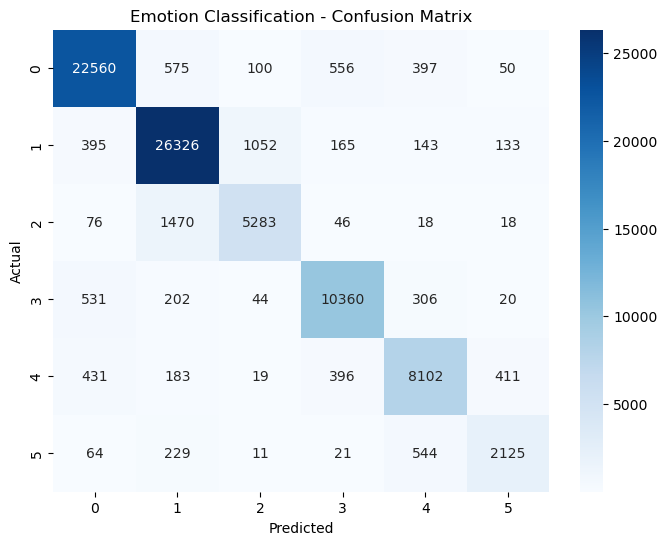

In [19]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_,
            yticklabels=model.classes_)
plt.title("Emotion Classification - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
